# Neural Networks

Neural networks are one of the most commonly used machine learning objects nowadays. Mostly these systems are known as **deep neural networks**, which just says something about how many layers in which neurons are arranged exist. We will in this lecture have a look at the basic unit, the neuron, and how to connect and train a network. We will do all ourselves, that means, we will not use one of the many existing python modules, that simplifies the task.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


plt.rcParams.update({'font.size': 18,
                     'axes.titlesize': 20,
                     'axes.labelsize': 20,
                     'axes.labelpad': 1,
                     'lines.linewidth': 2,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in'
                    })

## Building Blocks of Neural Networks

The basic unit of a neural network. A neuron takes inputs, does some math with them, and produces one output. The neuron below does that with two inputs. 

![image](img/neuron.png)

The neuron does now three things.

1. Take input values and multipy by weights

\begin{eqnarray}
x_{1}\rightarrow x_{1} w_{1}\\
x_{2}\rightarrow x_{2} w_{2}
\end{eqnarray}

2. All the weighted inputs are the added to a bias value $b$

\begin{equation}
 x_{1} w_{1}+ x_{2} w_{2}+b
\end{equation}

3. The output is generated by applying a function $f()$
\begin{equation}
y=f( x_{1} w_{1}+ x_{2} w_{2}+b)
\end{equation}



This function is called activation function. The activation function is used to turn an unbounded input value into a bounded output value with a predictable range. A commonly used activation function is the `sigmoid function`.

\begin{equation}
f(x)=\frac{1}{1+e^{-x}}
\end{equation}

In [5]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

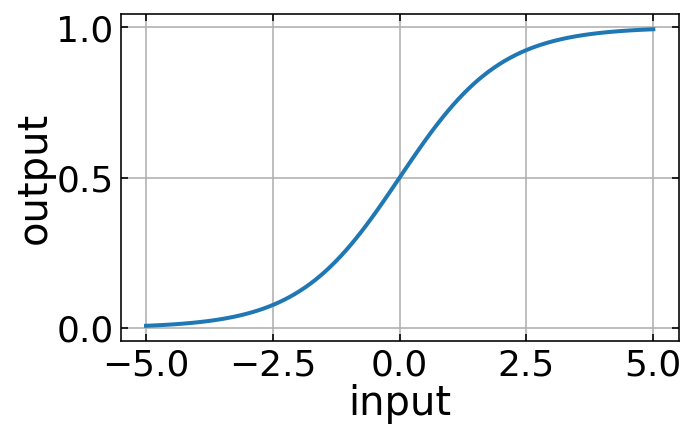

In [9]:
x=np.linspace(-5,5,100)
plt.figure(figsize=(5,3))
plt.plot(x,sigmoid(x))
plt.xlabel('input')
plt.ylabel('output')
plt.grid()
plt.show()

If we now have this kind of two input neuron with the weights $w$ and the bias value $b$

\begin{eqnarray}
w=[0,1]\\
b=4
\end{eqnarray}

we may supply and input 

\begin{eqnarray}
x=[2,3]
\end{eqnarray}

which gives writing it a s a dot product

\begin{equation}
y=f(w\cdot x+b)=f(7)=0.999
\end{equation}

This procedure of propagating the input values to obtain and output value is called **feedforward**.

## Making a Neuron

We would like to squeeze our knowledge not into a class, which we can use to create neuron objects that are arranged in a network.

In [14]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)



### Initialize the Neuron

In [15]:
weights = np.array([0, 1])
bias = 4                  
n = Neuron(weights, bias)

### Feedforward

In [16]:
x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


## Neural Network

It's now time to combine multiple neurons into a neural network. We want to arrange the neurons in layers. The first layer should be an input layer. The second is a so-called hidden layer and finally we have an output layer. Each layer can contain several neurons. We chose a rather simple structure, which looks like that 

![network](img/network.png)

## The network class

The class below defines the network as we have depicted it in the image above. The input neurons just contain the input values, so the hidden neurosn $h_{1}$, $h_{2}$ are the first neuron we need.

In [18]:
class Network:

  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # The Neuron class here is from the previous section
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1



0.7216325609518421


### Create the network

In [19]:
network = Network()
x = np.array([2, 3])
print(network.feedforward(x))

0.7216325609518421


## Data and loss

### We need data 

The network should infer trends from certain data. For that purpose, we need to supply the network with the appropriate data. We will use here data for persond with specific weight and height. The network should learn to predict the gender based on those data.

| Name | Weight | Height | Gender |
|------|:--------:|:--------:|:--------:|
| Mia|   133  |   65   |   F    |
| Bob  |   160  |   72   |   M    |
| Charlie|   152  |   70   |   M    |
| Diana|   120  |   60  |   F    |

To make the data more useful for the network we subtract mean values from the data and represent the gender in terms of a number.


| Name | Weight (-135) | Height (-66) | Gender |
|------|:--------:|:--------:|:--------:|
| Mia|   -2  |   -1   |   1    |
| Bob  |   25  |   6   |   0   |
| Charlie|   17  |   4   |   0    |
| Diana|   -15  |   -6  |   1    |

### Loss

Since we have now data, we also need to define a measure for how far the output deviates from the input. This measure is called **loss**. The mean squared error, as it appeared already during our fitting lecture, is defined as


\begin{equation}
MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{\rm true}-y_{\rm pred})^2
\end{equation}

for a number of $n$ datasets. Here $y_{\rm pred}$ is the data that is predicted by the network and $y_{\rm true}$ is the value which represents the truth for a specific person for example, e.g. (Alice: $y_{\rm true}=1$, female).

The results of the error calculation is thus lower, if the ourput of the network is closer to the true value of the training data.

The loss function is easily implemented.

In [25]:
def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

In [ ]:
We supply some data to calculate th emean squared error.

In [26]:
y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

In [27]:
print(mse_loss(y_true, y_pred)) 

0.5


## Training the network

### Backpropagation

The goal of all neural network training procedures is to minimize the loss and we have to find a way to minimize that loss. This is not so much different from our fitting of function values before. If we just take one dataset

| Name | Weight (-135) | Height (-66) | Gender |
|------|:--------:|:--------:|:--------:|
| Mia|   -2  |   -1   |   1    |

and calculate the $MSE$

$$
MSE=L=\frac{1}{1}\sum_{i=1}^{1}(y_{\rm true}-y_{\rm pred})^2=(y_{\rm true}-y_{\rm pred})^2=(1-y_{\rm pred})^2
$$

We know that the calculation of the output value of the network $y_{\rm pred}$ depends on the individual weights combining the inputs of each neuron. The output loss is thefore a function of all weights $w$ and bias values as well $b$.


![weights](img/weights.png)

In our simple system, we have 6 weights and 3 bias values.

$$
L(w_{1},w_{2},w_{3},w_{4},w_{4},w_{5},b_{1},b_{2},b_{3})
$$

which makes the loss function depend on the variation of those 9 parameters. The strength by which the value of the loss changes, when we vary $w_{1}$ is given by its partial derivative 

$$
\frac{\partial L}{\partial w_{1}}=\frac{\partial L}{\partial y_{\rm pred}}\frac{\partial y_{\rm pred}}{\partial w_{1}}
$$

As we know the true value and we have calculated the loss for a single dataset we can calculate the first part on the right side of the partial derivative. 

$$
\frac{\partial L}{\partial y_{\rm pred}}=\frac{\partial (1-y_{\rm pred})^2}{\partial y_{\rm pred}}=-2(1-y_{\rm pred})
$$

The second part needs to calculate the deritative of $y_{\rm pred}$ with respect to $w_{1}$. Since

$$
y_{\rm pred}=o_{1}=f(w_{5}h_{1}+w_{6}h_{2}+b_{3})
$$


and only $h_{1}$ is effected by $w_{1}$, we can write

$$
\frac{\partial y_{\rm pred}}{\partial w_{1}}=\frac{\partial y_{\rm pred}}{\partial h_{1}}\frac{\partial h_{1}}{\partial w_{1}}
$$

and 

$$
\frac{\partial y_{\rm pred}}{\partial h_{1}}=w_{5} f^{\prime}(w_{5}h_{1}+w_{6}h_{2}+b_{3})
$$


We can apply the same kind of chain rule for $h_{1}$.


$$
h_{1}=f(w_{1}x_{1}+w_{2}x_{2}+b1)
$$

and

$$
\frac{\partial h_{1}}{\partial w_{1}}=x_{1}f^{\prime}(w_{1}x_{1}+w_{2}x_{2}+b1)
$$

The derivative $f^{\prime}$ is just given by the derivative of the sigmoid function

$$
f^{\prime}(x)=\frac{e^{-x}}{(1+e^{-x})^2}=f(x)(1-f(x))
$$

Thus, stitching all together we obtain 

$$
\frac{\partial L}{\partial w_{1}}=\frac{\partial L}{\partial y_{}\rm pred}\frac{\partial y_{\rm pred}}{\partial h_{1}}\frac{\partial h_{1}}{\partial h_{1}}
$$

which is known as the backpropagation step of the calculation.

### Stochastic Gradient Descent

We have all the tools we need to train a neural network now! We’ll use an optimization algorithm called stochastic gradient descent (SGD) that tells us how to change our weights and biases to minimize loss. It’s basically just this update equation

$$
w_{1}\leftarrow w_{1}-\eta\frac{\partial L}{\partial w_{1}}
$$

where $\eta$ is a constant called the learning rate that controls how fast we train. All we’re doing is subtracting $\eta \partial L/\partial w_{1}$ from $w_{1}$

- If $\partial L/\partial w_{1}$  is positive, $w_{1}$ will decrease, which makes L decrease.
- If $\partial L/\partial w_{1}$  is negative, $w_{1}$ will increase, which makes L decrease.
If we do this for every weight and bias in the network, the loss will slowly decrease and our network will improve.
Our training process will look like this:
Choose one sample from our dataset. This is what makes it stochastic gradient descent — we only operate on one sample at a time.
Calculate all the partial derivatives of loss with respect to weights or biases (e.g. ∂L/∂w1​, ∂L​/∂w2​, etc).
Use the update equation to update each weight and bias.
Go back to step 1.
Let’s see it in action!

In [31]:
def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

In [32]:
class Network:

  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))


In [37]:
# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = Network()
network.train(data, all_y_trues)

Epoch 0 loss: 0.233
Epoch 10 loss: 0.185
Epoch 20 loss: 0.157
Epoch 30 loss: 0.134
Epoch 40 loss: 0.113
Epoch 50 loss: 0.095
Epoch 60 loss: 0.080
Epoch 70 loss: 0.067
Epoch 80 loss: 0.057
Epoch 90 loss: 0.049
Epoch 100 loss: 0.043
Epoch 110 loss: 0.037
Epoch 120 loss: 0.033
Epoch 130 loss: 0.030
Epoch 140 loss: 0.027
Epoch 150 loss: 0.024
Epoch 160 loss: 0.022
Epoch 170 loss: 0.021
Epoch 180 loss: 0.019
Epoch 190 loss: 0.018
Epoch 200 loss: 0.017
Epoch 210 loss: 0.016
Epoch 220 loss: 0.015
Epoch 230 loss: 0.014
Epoch 240 loss: 0.013
Epoch 250 loss: 0.012
Epoch 260 loss: 0.012
Epoch 270 loss: 0.011
Epoch 280 loss: 0.011
Epoch 290 loss: 0.010
Epoch 300 loss: 0.010
Epoch 310 loss: 0.009
Epoch 320 loss: 0.009
Epoch 330 loss: 0.009
Epoch 340 loss: 0.008
Epoch 350 loss: 0.008
Epoch 360 loss: 0.008
Epoch 370 loss: 0.008
Epoch 380 loss: 0.007
Epoch 390 loss: 0.007
Epoch 400 loss: 0.007
Epoch 410 loss: 0.007
Epoch 420 loss: 0.006
Epoch 430 loss: 0.006
Epoch 440 loss: 0.006
Epoch 450 loss: 0.006

In [38]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.950
Frank: 0.040
